In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
df = pd.read_csv("D:\\Data_Analysis\\Data_Analysis_Projects\\Supermarket_Sales_Analysis\\dataset\\supermarket_sales.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5% (per Unit),Total,Date,Time,Payment,Rating (out of 10)
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,5.3


##### Some important or required functions and variables.

In [4]:
import random
def generate_colors(n):
    # Generate n distinct random colors
    colors = []
    for _ in range(n):
        color = (random.random(), random.random(), random.random())
        colors.append(color)
    return colors

##### Task_1: Clean and prepare data.

In [5]:
#cleaning null values
df.isna().sum()

Invoice ID            0
Branch                0
City                  0
Customer type         0
Gender                0
Product line          0
Unit price            0
Quantity              0
Tax 5% (per Unit)     0
Total                 0
Date                  0
Time                  0
Payment               0
Rating (out of 10)    0
dtype: int64

In [6]:
#rounding the col [Unit price]
df["Unit price"] = round(df["Unit price"], 1)

In [7]:
#fixing the column Tax 5% (per Unit)
df["Tax 5% (per Unit)"] = (df["Unit price"] * 5) / 100
df["Tax 5% (per Unit)"] = df["Tax 5% (per Unit)"].round(1)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5% (per Unit),Total,Date,Time,Payment,Rating (out of 10)
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.7,7,3.7,548.9715,01-05-2019,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.3,5,0.8,80.2200,03-08-2019,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.3,7,2.3,340.5255,03-03-2019,13:23,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.2,8,2.9,489.0480,1/27/2019,20:33,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.3,7,4.3,634.3785,02-08-2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.4,1,2.0,42.3675,1/29/2019,13:46,Ewallet,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.4,10,4.9,1022.4900,03-02-2019,17:16,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.8,1,1.6,33.4320,02-09-2019,13:22,Cash,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.8,1,3.3,69.1110,2/22/2019,15:33,Cash,4.1


In [8]:
#calculating the columns total
df["Total"] = (df["Unit price"] * df["Quantity"]) - (df["Tax 5% (per Unit)"] * df["Quantity"])
df["Total"] = df["Total"].round(1)

In [9]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5% (per Unit),Total,Date,Time,Payment,Rating (out of 10)
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.7,7,3.7,497.0,01-05-2019,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.3,5,0.8,72.5,03-08-2019,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.3,7,2.3,308.0,03-03-2019,13:23,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.2,8,2.9,442.4,1/27/2019,20:33,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.3,7,4.3,574.0,02-08-2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.4,1,2.0,38.4,1/29/2019,13:46,Ewallet,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.4,10,4.9,925.0,03-02-2019,17:16,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.8,1,1.6,30.2,02-09-2019,13:22,Cash,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.8,1,3.3,62.5,2/22/2019,15:33,Cash,4.1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Invoice ID          1000 non-null   object 
 1   Branch              1000 non-null   object 
 2   City                1000 non-null   object 
 3   Customer type       1000 non-null   object 
 4   Gender              1000 non-null   object 
 5   Product line        1000 non-null   object 
 6   Unit price          1000 non-null   float64
 7   Quantity            1000 non-null   int64  
 8   Tax 5% (per Unit)   1000 non-null   float64
 9   Total               1000 non-null   float64
 10  Date                1000 non-null   object 
 11  Time                1000 non-null   object 
 12  Payment             1000 non-null   object 
 13  Rating (out of 10)  1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


In [11]:
#changing the dtype of col["Date"]
temp_sr = pd.to_datetime(df["Date"], format = "%d-%m-%Y", errors = "coerce")
temp_sr.fillna(pd.to_datetime(df["Date"], format = "%m/%d/%Y", errors = "coerce"), inplace = True)
df["Date"] = temp_sr

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Invoice ID          1000 non-null   object        
 1   Branch              1000 non-null   object        
 2   City                1000 non-null   object        
 3   Customer type       1000 non-null   object        
 4   Gender              1000 non-null   object        
 5   Product line        1000 non-null   object        
 6   Unit price          1000 non-null   float64       
 7   Quantity            1000 non-null   int64         
 8   Tax 5% (per Unit)   1000 non-null   float64       
 9   Total               1000 non-null   float64       
 10  Date                1000 non-null   datetime64[ns]
 11  Time                1000 non-null   object        
 12  Payment             1000 non-null   object        
 13  Rating (out of 10)  1000 non-null   float64      

##### Task_2: Plot col[Branch] on a bar graph.

In [13]:
#collecting the data
branch_dict = df["Branch"].value_counts().to_dict()
print(branch_dict)

{'A': 340, 'B': 332, 'C': 328}


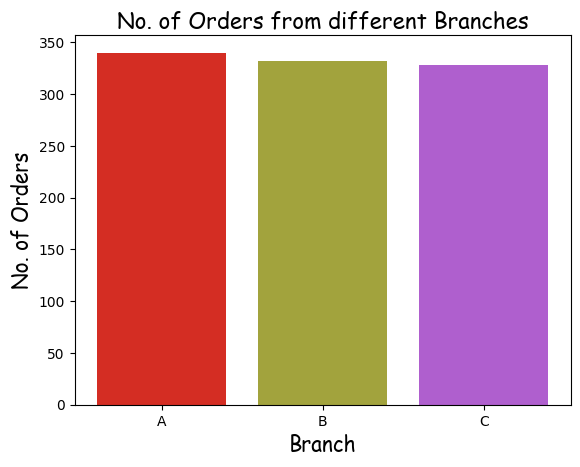

In [14]:
#plotting the graph
# plt.figure(dpi = 300)
plt.bar(branch_dict.keys(), branch_dict.values(), color = generate_colors(len(branch_dict)))

plt.title("No. of Orders from different Branches", fontdict = {"fontsize" : 16, "fontname" : "Comic Sans MS"})
plt.xlabel("Branch", fontdict = {"fontsize" : 15, "fontname" : "Comic Sans MS"})
plt.ylabel("No. of Orders", fontdict = {"fontsize" : 15, "fontname" : "Comic Sans MS"})

plt.show()

##### Task_3: Plot col[City] on a bar graph.

In [15]:
#collecting the data
city_dict = df["City"].value_counts().to_dict()
print(city_dict)

{'Yangon': 340, 'Mandalay': 332, 'Naypyitaw': 328}


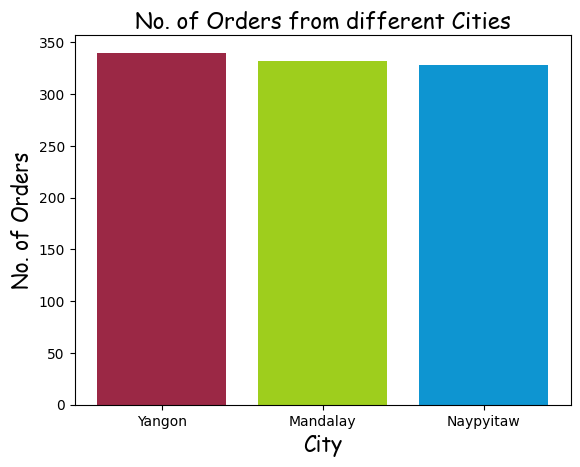

In [16]:
#plotting the graph
# plt.figure(dpi = 300)
plt.bar(city_dict.keys(), city_dict.values(), color = generate_colors(len(city_dict)))

plt.title("No. of Orders from different Cities", fontdict = {"fontsize" : 16, "fontname" : "Comic Sans MS"})
plt.xlabel("City", fontdict = {"fontsize" : 15, "fontname" : "Comic Sans MS"})
plt.ylabel("No. of Orders", fontdict = {"fontsize" : 15, "fontname" : "Comic Sans MS"})

plt.show()        

##### Task_4: Represent the col[Customer Type] on a pie chart.

In [17]:
#collecting the data
customer_type_dict = df["Customer type"].value_counts().to_dict()
print(customer_type_dict)

{'Member': 501, 'Normal': 499}


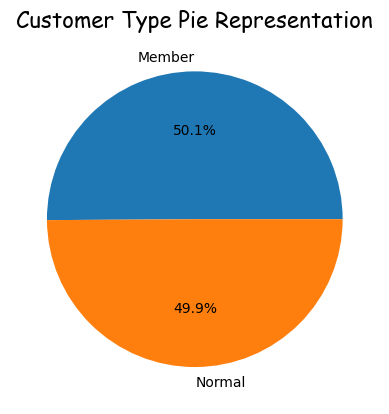

In [20]:
#plotting the pie chart
# plt.figure(dpi = 300)
plt.pie(customer_type_dict.values(), labels = customer_type_dict.keys(), autopct = "%1.1f%%")

plt.title("Customer Type Pie Representation", fontdict = {"fontsize" : 16, "fontname" : "Comic Sans MS"})

plt.show()

##### Task_5: Represent the column[Gender] on a pie chart.

In [21]:
#collecting the information
gender_dict = df["Gender"].value_counts().to_dict()
print(gender_dict)

{'Female': 501, 'Male': 499}


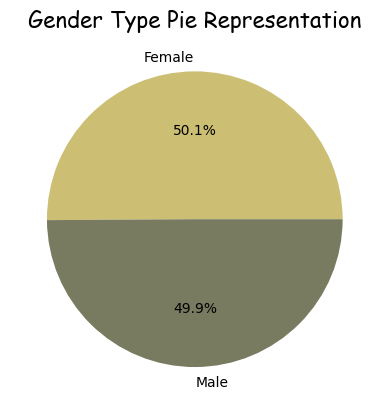

In [29]:
#plotting the pie chart
# plt.figure(dpi = 300)
plt.pie(gender_dict.values(), labels = gender_dict.keys(), autopct = "%1.1f%%", colors = generate_colors(2))

plt.title("Gender Type Pie Representation", fontdict = {"fontsize" : 16, "fontname" : "Comic Sans MS"})

plt.show()

##### Task_6: Draw a bar graph to represent the No. of orders from different product lines.

In [30]:
#collecting the data
product_line_dict = df["Product line"].value_counts().to_dict()
print(product_line_dict)

{'Fashion accessories': 178, 'Food and beverages': 174, 'Electronic accessories': 170, 'Sports and travel': 166, 'Home and lifestyle': 160, 'Health and beauty': 152}


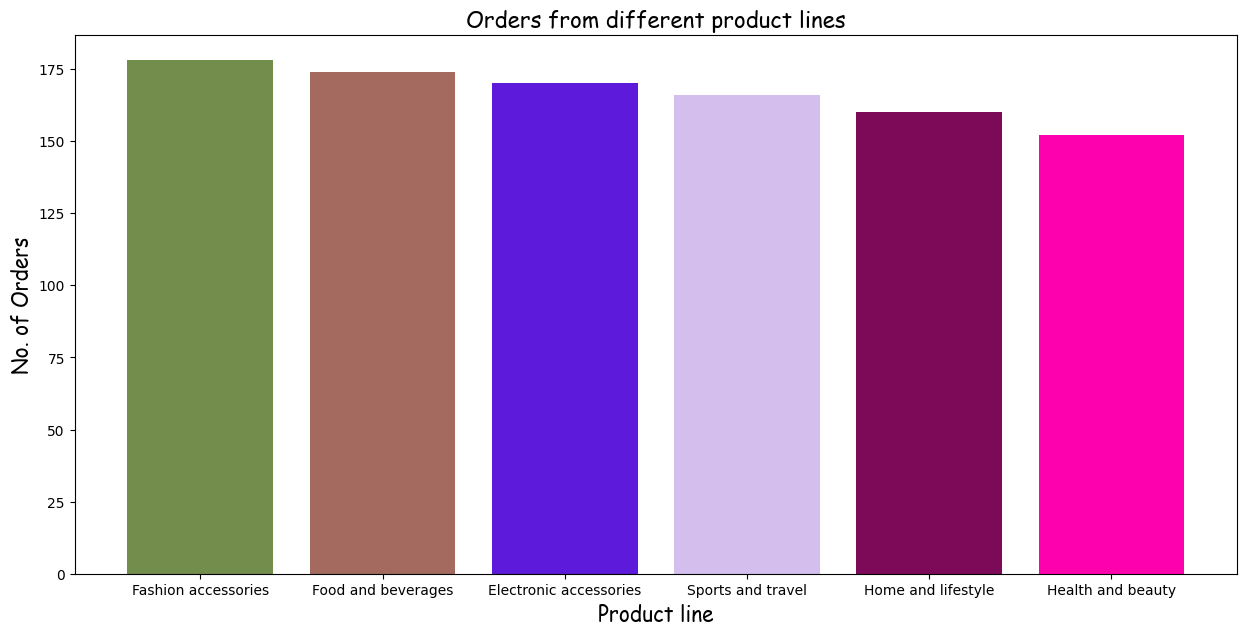

In [36]:
#plotting the bar graph
plt.figure(figsize = (15, 7)) # dpi = 300
plt.bar(product_line_dict.keys(), product_line_dict.values(), color = generate_colors(len(product_line_dict)))

plt.title("Orders from different product lines", fontdict = {"fontsize" : 16, "fontname" : "Comic Sans MS"})
plt.xlabel("Product line", fontdict = {"fontsize" : 15, "fontname" : "Comic Sans MS"})
plt.ylabel("No. of Orders", fontdict = {"fontsize" : 15, "fontname" : "Comic Sans MS"})

plt.show()

##### Task_7: Draw a histogram to represent total price for each order.

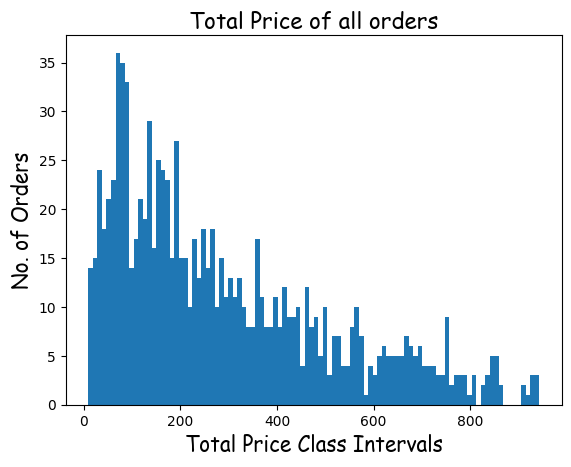

In [44]:
#plotting the histogram
# plt.figure(dpi = 300)
plt.hist(df["Total"], bins = 100)

plt.title("Total Price of all orders", fontdict = {"fontsize" : 16, "fontname" : "Comic Sans MS"})
plt.xlabel("Total Price Class Intervals", fontdict = {"fontsize" : 15, "fontname" : "Comic Sans MS"})
plt.ylabel("No. of Orders", fontdict = {"fontsize" : 15, "fontname" : "Comic Sans MS"})

plt.show()

# Finish